**IMPORTING AND SETTING UP THE NECESSARY DEPENDENCIES**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, Reshape
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from datetime import datetime
from sklearn.model_selection import train_test_split

**DATA LOADING AND PREPROCESSING**

In [ ]:
data_f=pd.read_csv(File_Path)

In [ ]:
data_f.shape

(2013, 7)

In [ ]:
data_f.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-04-25,26.250000,26.412500,26.127501,26.270000,24.015160,112126400
1,2016-04-26,25.977501,26.325001,25.977501,26.087500,23.848322,224064800
2,2016-04-27,24.000000,24.677500,23.920000,24.455000,22.355942,458408400
3,2016-04-28,24.402500,24.469999,23.562500,23.707500,21.672598,328970800
4,2016-04-29,23.497499,23.680000,23.127501,23.434999,21.423492,274126000


In [ ]:
data_f['Date']=pd.to_datetime(data_f.Date, format="%Y-%m-%d")
data_f.index = data_f.pop('Date')

In [ ]:
data_f.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-04-25,26.250000,26.412500,26.127501,26.270000,24.015160,112126400
2016-04-26,25.977501,26.325001,25.977501,26.087500,23.848322,224064800
2016-04-27,24.000000,24.677500,23.920000,24.455000,22.355942,458408400
2016-04-28,24.402500,24.469999,23.562500,23.707500,21.672598,328970800
2016-04-29,23.497499,23.680000,23.127501,23.434999,21.423492,274126000


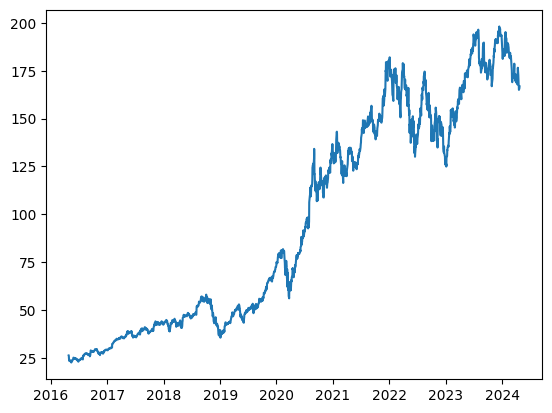

In [ ]:
plt.plot(data_f['Close'])

In [ ]:
data = data_f['Close'].values
data=np.reshape(data,(-1,1))
print(data.shape)

(2013, 1)


**DATA RESCALING USING MIN-MAX NORMALIZATION**

In [ ]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)

print(scaled_data)

[[-1.2405391 ]
 [-1.24375292]
 [-1.27250116]
 ...
 [ 1.20248887]
 [ 1.21728116]
 [ 1.23486478]]


In [ ]:
train_size=int(len(data)*0.8)
test_size=int(len(data)-train_size)
print(train_size, test_size)

1610 403


In [ ]:

train_data=scaled_data[0:train_size]
test_data=scaled_data[train_size:]
print(train_data)
print(test_data)

[[-1.2405391 ]
 [-1.24375292]
 [-1.27250116]
 ...
 [ 1.17484113]
 [ 1.00596179]
 [ 1.03184845]]
[[0.98007515]
 [0.95066657]
 [1.01723216]
 [1.05984819]
 [1.00384868]
 [0.98659101]
 [0.94591182]
 [0.95189939]
 [0.96933308]
 [0.935522  ]
 [0.80591279]
 [0.73054223]
 [0.80538451]
 [0.86966097]
 [0.87494375]
 [0.85786208]
 [0.76382502]
 [0.76963633]
 [0.74427797]
 [0.73300761]
 [0.81489402]
 [0.73371216]
 [0.80468023]
 [0.82827749]
 [0.8302146 ]
 [0.82193789]
 [0.89026458]
 [0.92865414]
 [0.97954687]
 [0.9268933 ]
 [0.84676799]
 [1.03942085]
 [0.99715682]
 [0.94978602]
 [0.85081821]
 [0.74251714]
 [0.73371216]
 [0.74322141]
 [0.75343522]
 [0.67190107]
 [0.88322044]
 [0.93305663]
 [0.90805054]
 [0.93904394]
 [0.9170315 ]
 [0.95101884]
 [0.96105637]
 [0.90329578]
 [0.94150933]
 [0.95718243]
 [0.90505688]
 [0.83655419]
 [0.78284379]
 [0.90364805]
 [0.90857882]
 [0.89977384]
 [0.87899423]
 [0.81348521]
 [0.77879358]
 [0.80890645]
 [0.80027775]
 [0.84130894]
 [0.85856662]
 [0.81876824]
 [0.7006

In [ ]:
#CREATING THE TRAINING DATASET
n_days=60
X_train=[]
y_train=[]
for i in range (n_days,len(train_data)):
    X_train.append(train_data[i-n_days:i,:])
    y_train.append(train_data[i,:])

X_train, y_train= np.array(X_train),np.array(y_train)
print(X_train.shape)
print(y_train.shape)

(1550, 60, 1)
(1550, 1)


In [ ]:
#CREATING THE TESTING DATASET
n_days=60
X_test=[]
y_test=[]
for i in range (n_days,len(test_data)):
    X_test.append(test_data[i-n_days:i,:])
    y_test.append(test_data[i,:])
X_test, y_test= np.array(X_test),np.array(y_test)
print(X_test.shape)
print(y_test.shape)

(343, 60, 1)
(343, 1)


**LSTM ARCHITECTURE DESIGN**

In [ ]:
model=Sequential()
model.add(LSTM(128, activation ='relu',return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(64,activation ='relu', return_sequences=False ))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_test,y_test),
    verbose=2
)

Epoch 1/50
25/25 - 5s - 203ms/step - accuracy: 0.0000e+00 - loss: 0.2401 - val_accuracy: 0.0000e+00 - val_loss: 0.0173
Epoch 2/50
25/25 - 3s - 105ms/step - accuracy: 0.0000e+00 - loss: 0.0076 - val_accuracy: 0.0000e+00 - val_loss: 0.0136
Epoch 3/50
25/25 - 3s - 130ms/step - accuracy: 0.0000e+00 - loss: 0.0053 - val_accuracy: 0.0000e+00 - val_loss: 0.0100
Epoch 4/50
25/25 - 3s - 107ms/step - accuracy: 0.0000e+00 - loss: 0.0049 - val_accuracy: 0.0000e+00 - val_loss: 0.0123
Epoch 5/50
25/25 - 3s - 101ms/step - accuracy: 0.0000e+00 - loss: 0.0050 - val_accuracy: 0.0000e+00 - val_loss: 0.0102
Epoch 6/50
25/25 - 3s - 101ms/step - accuracy: 0.0000e+00 - loss: 0.0042 - val_accuracy: 0.0000e+00 - val_loss: 0.0075
Epoch 7/50
25/25 - 3s - 137ms/step - accuracy: 0.0000e+00 - loss: 0.0038 - val_accuracy: 0.0000e+00 - val_loss: 0.0071
Epoch 8/50
25/25 - 2s - 97ms/step - accuracy: 0.0000e+00 - loss: 0.0035 - val_accuracy: 0.0000e+00 - val_loss: 0.0060
Epoch 9/50
25/25 - 2s - 99ms/step - accuracy: 0.0

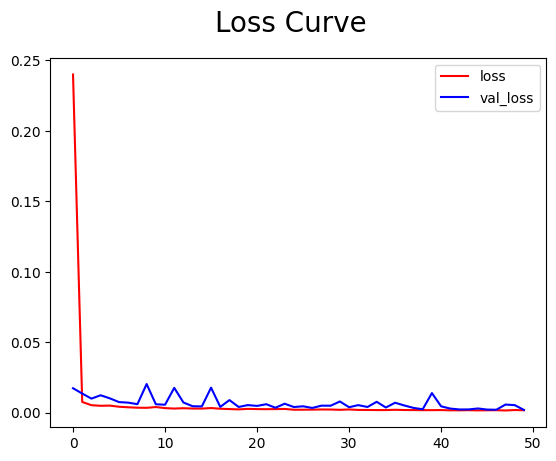

In [ ]:

fig = plt.figure()
plt.plot(history.history['loss'], color='red', label='loss')
plt.plot(history.history['val_loss'], color='blue', label='val_loss')
fig.suptitle('Loss Curve', fontsize=20)
plt.legend(loc='upper right')
plt.show()

**MODEL TESTING**

In [ ]:
prediction=model.predict(X_test)
prediction=scaler.inverse_transform(prediction)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


In [ ]:
comparison=pd.DataFrame(data_f['Close'][-(len(y_test)):])
comparison=comparison.rename(columns={'Close':'Actual Close Price'})
comparison['Predicted Close Price']=prediction
comparison


,Actual Close Price,Predicted Close Price
Date,,
2022-12-09,142.160004,143.282074
2022-12-12,144.490005,143.105865
2022-12-13,145.470001,144.393463
2022-12-14,143.210007,145.855347
2022-12-15,136.500000,145.520279
...,...,...
2024-04-17,168.000000,171.778229
2024-04-18,167.039993,168.790970
2024-04-19,165.000000,167.121964


In [ ]:
RMSE = np.sqrt(np.mean(comparison['Predicted Close Price']-comparison['Actual Close Price'])**2)
RMSE

np.float64(0.2735392865086331)

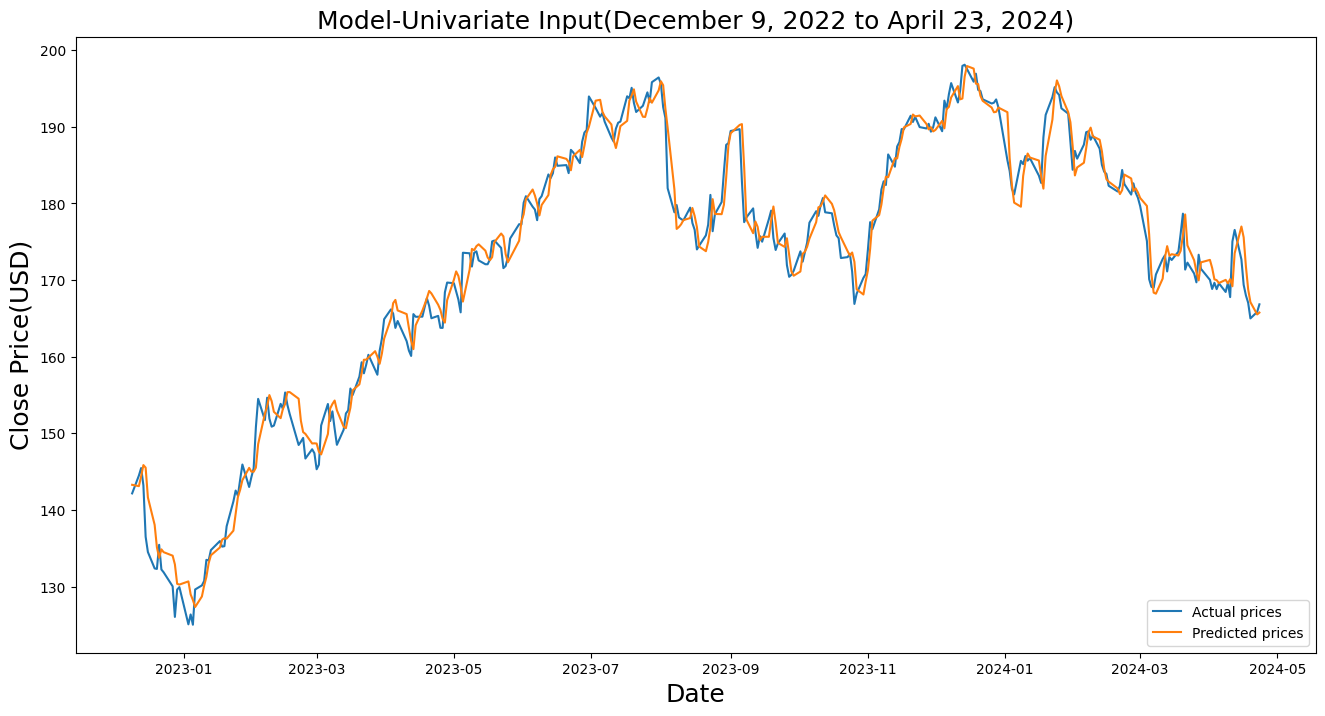

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Model-Univariate Input(December 9, 2022 to April 23, 2024)', fontsize = 18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price(USD)', fontsize=18)
plt.plot(comparison['Actual Close Price'])
plt.plot(comparison['Predicted Close Price'])
plt.legend(['Actual prices', 'Predicted prices'], loc='lower right')

**SAVING THE MODEL FOR REPRODUCIBILITY OF THE RESULT**

In [ ]:
my_model = (Saved_model_path)

In [ ]:
model.save(my_model)

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
loaded_model = load_model(my_model)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
The value is RMSE 0.2735392865086331


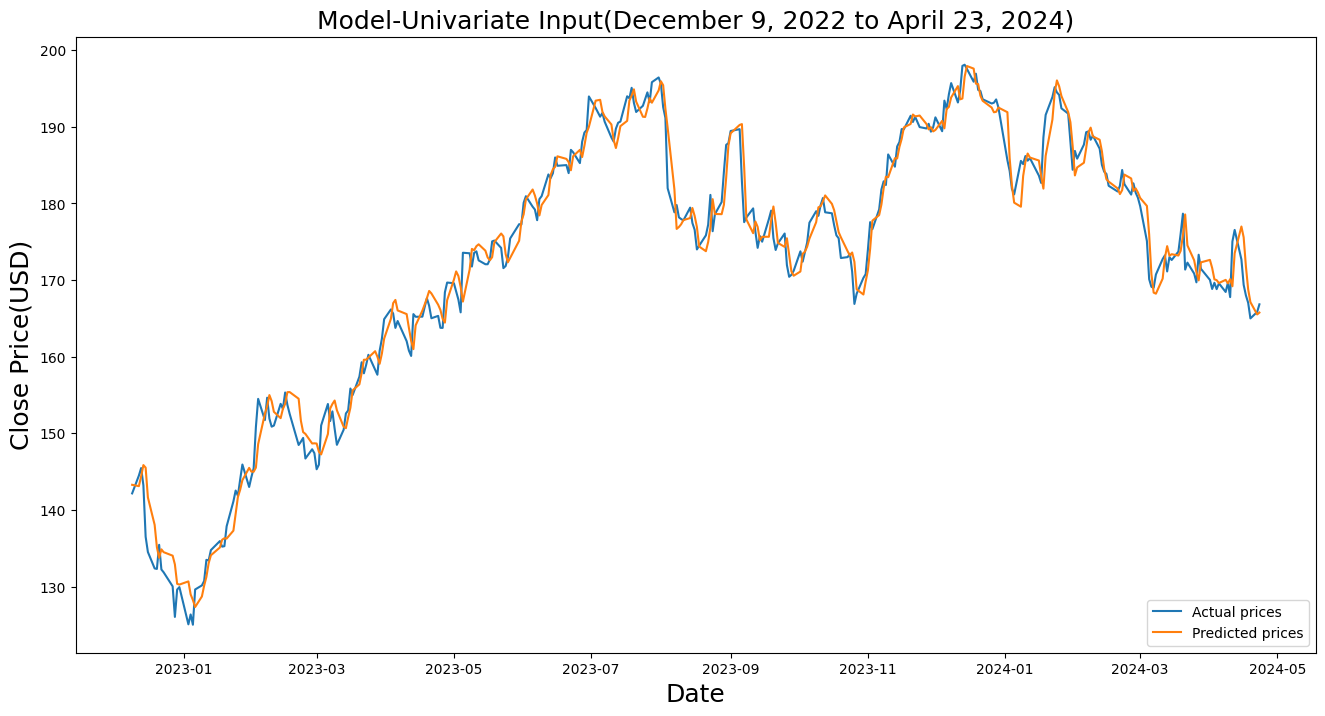

In [ ]:
prediction=loaded_model.predict(X_test)
prediction=scaler.inverse_transform(prediction)
comparison=pd.DataFrame(data_f['Close'][-(len(y_test)):])
comparison=comparison.rename(columns={'Close':'Actual Close Price'})
comparison['Predicted Close Price']=prediction

plt.figure(figsize=(16,8))
plt.title('Model-Univariate Input(December 9, 2022 to April 23, 2024)', fontsize = 18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price(USD)', fontsize=18)
plt.plot(comparison['Actual Close Price'])
plt.plot(comparison['Predicted Close Price'])
RMSE = np.sqrt(np.mean(comparison['Predicted Close Price']-comparison['Actual Close Price'])**2)
print('The value is RMSE', RMSE)
plt.legend(['Actual prices', 'Predicted prices'], loc='lower right')